In [14]:
import yfinance as yf
import numpy as np

In [40]:
df = yf.download('SPY').reset_index()

df['all_time_high'] = df['High'].cummax()
df['distance_from_ath'] = df['Close']/df['all_time_high'] - 1

df['pct_change'] = df['Close'].pct_change().shift(-1)
df['200_sma'] = df['Close'].rolling(200).mean()

df = df.dropna()

df['close_above_sma'] = df['Close'] > df['200_sma']

count = 0 
for index, row in df.iterrows():
    if row['close_above_sma']:
        count += 1  # Increment the count if close is above 200-day MA
    else:
        count = 0  # Reset the count if close is below 200-day MA
    df.loc[index, 'consec_days_above_sma'] = count  # Update the count in the DataFrame


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

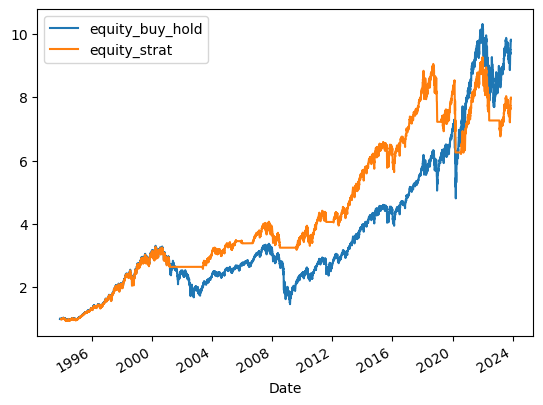

In [46]:
df['signal'] = np.select(
    condlist=[
        (df['consec_days_above_sma'] == 18), # Buy signal
        (df['distance_from_ath'] < -0.2) & (df['distance_from_ath'].shift(1) > -0.2), # Sell signal
    ],
    choicelist=[1, 0],
    default=np.nan,
)

df['signal'] = df['signal'].ffill()

df['equity_buy_hold'] = np.cumprod(1+df['pct_change'])
df['equity_strat'] = np.cumprod(1+df['signal']*df['pct_change'])

df.plot(x='Date', y=['equity_buy_hold', 'equity_strat'])

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

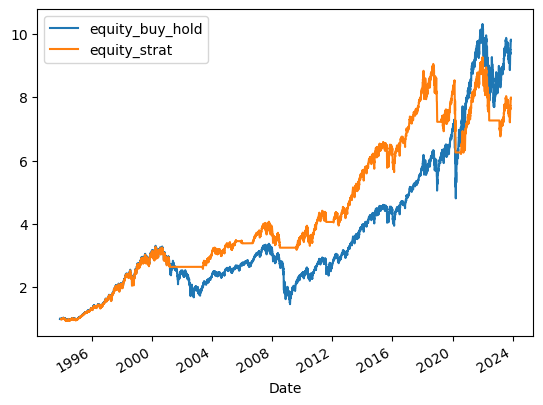

In [52]:
import yfinance as yf
import numpy as np

df = yf.download('SPY').reset_index()

df['all_time_high'] = df['High'].cummax()
df['distance_from_ath'] = df['Close']/df['all_time_high'] - 1

df['pct_change'] = df['Close'].pct_change().shift(-1)
df['200_sma'] = df['Close'].rolling(200).mean()

df = df.dropna()

df['close_above_sma'] = df['Close'] > df['200_sma']

count = 0 
for index, row in df.iterrows():
    if row['close_above_sma']:
        count += 1  # Increment the count if close is above 200-day MA
    else:
        count = 0  # Reset the count if close is below 200-day MA
    df.loc[index, 'consec_days_above_sma'] = count  # Update the count in the DataFrame
    
df['signal'] = np.select(
    condlist=[
        (df['consec_days_above_sma'] == 18), # Buy signal
        (df['distance_from_ath'] < -0.2) & (df['distance_from_ath'].shift(1) > -0.2), # Sell signal
    ],
    choicelist=[1, 0],
    default=np.nan,
)

df['signal'] = df['signal'].ffill()

df['equity_buy_hold'] = np.cumprod(1+df['pct_change'])
df['equity_strat'] = np.cumprod(1+df['signal']*df['pct_change'])

df.plot(x='Date', y=['equity_buy_hold', 'equity_strat'])